In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ricardo Santos\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Ricardo
[nltk_data]     Santos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ricardo
[nltk_data]     Santos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
transactions = pd.read_csv('./CSVs/retail.csv')
transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
#general info
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
transactions.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
transactions.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [7]:
#we will start by only keeping alphanumeric values and uncapitalizing all of the text

transactions['StockCode'] = transactions['StockCode'].str.replace('[^a-zA-Z0-9 ]', '').str.lower()
transactions['Description'] = transactions['Description'].str.replace('[^a-zA-Z0-9 ]', '').str.lower()
transactions['Description']=transactions['Description'].str.strip()
transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123a,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406b,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029g,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029e,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,childrens apron dolly girl,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680.0,France


There are a lot of missing values: namely customer ID and product description.

Additionally, the variable customer ID should be object and date should be datetime.

We'll start by converting and then looking into addressing the Missing values

In [8]:
#Delete some useless rows
not_products = ['unsaleable destroyed.', 'found by jackie', 'bank charges', 'cruk commission', 'adjust bad debt', 'ebay', 'throw away',
                'damages', 'thrown away', 'amazon',  'amazon fee', 'samples', 'manual', 'dotcom postage', 'carriage', 
               'discount', 'postage','readjustment','adjustment','next day carriage', 'check', 'thrown awaycant sell', 'thrown awayrusty',]
transactions = transactions[~transactions['Description'].isin(not_products)]
transactions


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123a,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406b,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029g,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029e,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,childrens apron dolly girl,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
get_null = transactions[transactions['CustomerID'].isna()]
#Assigning negative customer id to avoid shenanigans with adding new customers
id_= get_null['InvoiceNo'].unique()
value = list(range(-len(get_null['InvoiceNo'].unique()), 0))
prod_dict = dict(zip(id_,value))

#in original df replace nans in description with correspondence
transactions['CustomerID'] = transactions['CustomerID'].fillna(transactions['InvoiceNo'].map(prod_dict))

In [10]:
#dealing with the first nans in the df 

#Creating dataframe with missing values
null_prods = transactions[transactions['Description'].isnull()]

#Getting the invoice number of every row with nan
find_me = set(null_prods['StockCode'])
null_prods = transactions.loc[transactions['StockCode'].isin(find_me)]

#eliminate nans
null_prods = null_prods.loc[null_prods['Description'].notnull()]

#extract valus in 2 columns of interest
id_= null_prods['StockCode'].values
value = null_prods['Description'].values
prod_dict = dict(zip(id_,value))

#in original df replace nans in description with correspondence
transactions['Description'] = transactions['Description'].fillna(transactions['StockCode'].map(prod_dict))

del null_prods
sum(transactions['Description'].isna())

118

In [11]:
#Before creating a dict to fill nas, we'll need to discover the relationships between codes and descriptors
#for that we'll remove nas

rel_identifier = transactions.loc[transactions['Description'].notnull()]
rel_identifier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123a,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406b,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029g,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029e,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,childrens apron dolly girl,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680.0,France


In [12]:
#Looking to find relationships between stock code and description
#we are interested that relationships are one to one, 
#we may need to address 

rel_identifier['one to one'] = (rel_identifier.groupby('Description')['StockCode'].transform(lambda x:x.nunique()==1) & rel_identifier.groupby('StockCode')['Description'].transform(lambda x:x.nunique()==1))


rel_identifier['many to one'] = (rel_identifier.groupby('Description')['StockCode'].transform(lambda x:x.nunique()>1) & rel_identifier.groupby('StockCode')['Description'].transform(lambda x:x.nunique()==1))


rel_identifier['one to many'] = (rel_identifier.groupby('StockCode')['Description'].transform(lambda x:x.nunique()>1) &rel_identifier.groupby('Description')['StockCode'].transform(lambda x:x.nunique()==1))


rel_identifier['many to many'] = (rel_identifier.groupby('StockCode')['Description'].transform(lambda x:x.nunique()>1) & rel_identifier.groupby('Description')['StockCode'].transform(lambda x:x.nunique()>1))


conditions = [
    (rel_identifier['one to one'] == True), (rel_identifier['one to many'] == True),(rel_identifier['many to one'] == True),(rel_identifier['many to many'] == True)]
choices = ['one to one', 'one to many', 'many to one','many to many']
rel_identifier['relation'] = np.select(conditions, choices)

rel_identifier = rel_identifier.drop(['one to one', 'one to many', 'many to one','many to many'], axis = 1)

#only show rows pairs without one to one relationship
non_unique = rel_identifier[rel_identifier['relation'] != 'one to one']
non_unique

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,relation
0,536365,85123a,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,one to many
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,one to many
2,536365,84406b,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,one to many
8,536366,22632,hand warmer red polka dot,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,one to many
9,536367,84879,assorted colour bird ornament,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,one to many
...,...,...,...,...,...,...,...,...,...
541884,581585,84946,antique silver tlight glass,12,12/9/2011 12:31,1.25,15804.0,United Kingdom,one to many
541888,581585,23145,zinc tlight holder star large,12,12/9/2011 12:31,0.95,15804.0,United Kingdom,one to many
541889,581585,22466,fairy tale cottage night light,12,12/9/2011 12:31,1.95,15804.0,United Kingdom,one to many
541903,581587,23256,childrens cutlery spaceboy,4,12/9/2011 12:50,4.15,12680.0,France,one to many


In [13]:
non_unique.describe(include = 'all', datetime_is_numeric=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,relation
count,93076,93076,93076,93076.000000,93076,93076.000000,93076.000000,93076,93076
unique,18186,525,843,NaN,16977,NaN,NaN,38,3
top,573585,85123a,white hanging heart tlight holder,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom,one to many
freq,167,2380,2369,NaN,167,NaN,NaN,85553,90004
mean,NaN,NaN,NaN,9.708099,NaN,3.715430,11642.650780,NaN,NaN
std,NaN,NaN,NaN,81.512106,NaN,6.125125,7096.364957,NaN,NaN
min,NaN,NaN,NaN,-9600.000000,NaN,0.000000,-3243.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.450000,12599.750000,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,2.460000,14511.000000,NaN,NaN
75%,NaN,NaN,NaN,12.000000,NaN,4.150000,16352.000000,NaN,NaN


### Addressing different issues one at a time, starting by one to manys

Assumes code to be more reliable than description.

In one to many relationships (the most common) the correct description will be the mode of each corresponding code.

In [14]:
om = non_unique[non_unique['relation'] == 'one to many']

#below commented cells were used as debuggers
#om['StockCode'].value_counts()
#printom['Description'].value_counts()

#extract valus in 2 columns of interest- starting with assigning description to code
id_= om['StockCode'].values
prod_dict = om.groupby('StockCode')['Description'].agg(lambda x:x.value_counts().index[0]).to_dict()

#in original df replace description with key value
non_unique['Description'] = np.where(non_unique['StockCode'].isin(prod_dict.keys()), non_unique['StockCode'].map(prod_dict), non_unique['Description'])

#check how many many to one / one to many were fixed
non_unique['one to one'] = (non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()==1) & non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()==1))

non_unique['many to one'] = (non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()>1) & non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()==1))

non_unique['one to many'] = (non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()>1) & non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()==1))

non_unique['many to many'] = (non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()>1) & non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()>1))

conditions = [
    (non_unique['one to one'] == True), (non_unique['one to many'] == True),(non_unique['many to one'] == True),(non_unique['many to many'] == True)]
choices = ['one to one', 'one to many', 'many to one','many to many']
non_unique['relation'] = np.select(conditions, choices)

non_unique = non_unique.drop(['one to one', 'one to many', 'many to one','many to many'], axis = 1)
non_unique['relation'].value_counts()

one to one      90556
many to one      2299
many to many      219
one to many         2
Name: relation, dtype: int64

In [15]:
#we still have plenty one to many, need to see again

om = non_unique[non_unique['relation'] == 'one to many']

#below commented cells were used as debuggers
#om['StockCode'].value_counts()
#printom['Description'].value_counts()


#extract valus in 2 columns of interest- starting with assigning description to code
id_= om['StockCode'].values
prod_dict = om.groupby('StockCode')['Description'].agg(lambda x:x.value_counts().index[0]).to_dict()

#in original df replace description with key value
non_unique['Description'] = np.where(non_unique['StockCode'].isin(prod_dict.keys()), non_unique['StockCode'].map(prod_dict), non_unique['Description'])

#check how many many to one / one to many were fixed

non_unique['one to one'] = (non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()==1) & non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()==1))


non_unique['many to one'] = (non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()>1) & non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()==1))


non_unique['one to many'] = (non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()>1) & non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()==1))


non_unique['many to many'] = (non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()>1) & non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()>1))

conditions = [
    (non_unique['one to one'] == True), (non_unique['one to many'] == True),(non_unique['many to one'] == True),(non_unique['many to many'] == True)]
choices = ['one to one', 'one to many', 'many to one','many to many']
non_unique['relation'] = np.select(conditions, choices)

non_unique = non_unique.drop(['one to one', 'one to many', 'many to one','many to many'], axis = 1)
non_unique['relation'].value_counts()

one to one     90962
many to one     2114
Name: relation, dtype: int64

In [16]:
mo = non_unique[non_unique['relation'] == 'many to one']

#below commented cells were used as debuggers
#om['StockCode'].value_counts()
#printom['Description'].value_counts()


#extract valus in 2 columns of interest- starting with assigning description to code
id_= mo['Description'].values
prod_dict = mo.groupby('Description')['StockCode'].agg(lambda x:x.value_counts().index[0]).to_dict()

#in original df replace description with key value
non_unique['StockCode'] = np.where(non_unique['Description'].isin(prod_dict.keys()), non_unique['Description'].map(prod_dict), non_unique['StockCode'])

#check how many many to one / one to many were fixed

non_unique['one to one'] = (non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()==1) & non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()==1))


non_unique['many to one'] = (non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()>1) & non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()==1))


non_unique['one to many'] = (non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()>1) & non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()==1))


non_unique['many to many'] = (non_unique.groupby('StockCode')['Description'].transform(lambda x:x.nunique()>1) & non_unique.groupby('Description')['StockCode'].transform(lambda x:x.nunique()>1))

conditions = [
    (non_unique['one to one'] == True), (non_unique['one to many'] == True),(non_unique['many to one'] == True),(non_unique['many to many'] == True)]
choices = ['one to one', 'one to many', 'many to one','many to many']
non_unique['relation'] = np.select(conditions, choices)

non_unique = non_unique.drop(['one to one', 'one to many', 'many to one','many to many'], axis = 1)
non_unique['relation'].value_counts()

one to one    93076
Name: relation, dtype: int64

In [17]:
rel_identifier.update(non_unique)

#Looking to find relationships between stock code and description
#we are interested that relationships are one to one, 
#we may need to address 

rel_identifier['one to one'] = (rel_identifier.groupby('Description')['StockCode'].transform(lambda x:x.nunique()==1) & rel_identifier.groupby('StockCode')['Description'].transform(lambda x:x.nunique()==1))


rel_identifier['many to one'] = (rel_identifier.groupby('Description')['StockCode'].transform(lambda x:x.nunique()>1) & rel_identifier.groupby('StockCode')['Description'].transform(lambda x:x.nunique()==1))


rel_identifier['one to many'] = (rel_identifier.groupby('StockCode')['Description'].transform(lambda x:x.nunique()>1) &rel_identifier.groupby('Description')['StockCode'].transform(lambda x:x.nunique()==1))


rel_identifier['many to many'] = (rel_identifier.groupby('StockCode')['Description'].transform(lambda x:x.nunique()>1) & rel_identifier.groupby('Description')['StockCode'].transform(lambda x:x.nunique()>1))


conditions = [
    (rel_identifier['one to one'] == True), (rel_identifier['one to many'] == True),(rel_identifier['many to one'] == True),(rel_identifier['many to many'] == True)]
choices = ['one to one', 'one to many', 'many to one','many to many']
rel_identifier['relation'] = np.select(conditions, choices)

rel_identifier = rel_identifier.drop(['one to one', 'one to many', 'many to one','many to many'], axis = 1)

#only show rows pairs without one to one relationship
non_unique = rel_identifier[rel_identifier['relation'] != 'one to one']
non_unique

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,relation


#### Everything is one to one on the original file, we can go back to original df

In [18]:
#extract valus in 2 columns of interest- starting with assigning description to code
id_= rel_identifier['StockCode'].values
value = rel_identifier['Description'].values
prod_dict = dict(zip(id_,value))

del non_unique

#update transaction table
transactions.update(rel_identifier)
transactions['Description'] = np.where(transactions['StockCode'].isin(prod_dict.keys()), transactions['StockCode'].map(prod_dict), transactions['Description'])

del rel_identifier
#remove nulls after mapping - means we won't have these values
transactions = transactions.loc[transactions['Description'].notnull()]
transactions.describe(include = 'all', datetime_is_numeric=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,538532,538532,538532,538532.000000,538532,538532.000000,538532.000000,538532
unique,24913,3797,3797,NaN,22525,NaN,NaN,38
top,573585,85123a,white hanging heart tlight holder,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1113,2380,2380,NaN,1113,NaN,NaN,493422
mean,NaN,NaN,NaN,9.652513,NaN,3.270415,11125.448085,NaN
std,NaN,NaN,NaN,218.436858,NaN,4.493696,7424.910205,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,-3244.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,12360.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,14395.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16265.000000,NaN


### add new features


In [19]:
#add new features

#date
transactions['InvoiceDate'] = pd.to_datetime(transactions['InvoiceDate'])
transactions['Month'] = transactions['InvoiceDate'].dt.month
transactions['Day'] = transactions['InvoiceDate'].dt.day
transactions['Hour'] = transactions['InvoiceDate'].dt.hour

#sales
transactions['Sales'] = transactions['Quantity']*transactions['UnitPrice']

#Frequency of purchases
temp = transactions.copy()
temp.drop_duplicates(['InvoiceNo','CustomerID'],inplace=True)
frequency_df = temp.groupby(by=['CustomerID'])['InvoiceNo'].count()
frequency_df = pd.DataFrame(frequency_df.values, index = frequency_df.index, columns=['Frequency'])
transactions = pd.merge(transactions,frequency_df,on=['CustomerID'])


#Number of times a  client purchase a given product
temp = transactions.copy()
times_bought = temp.groupby(['CustomerID','Description'])['Quantity'].sum()
times_bought = pd.DataFrame(times_bought.values, index = times_bought.index, columns=['total_product_purchases']).reset_index()
transactions = pd.merge(transactions,times_bought,on=['CustomerID','Description'])

### Creation of category columns

In [20]:
#code adapted from https://www.kaggle.com/fabiendaniel/customer-segmentation

def keywords_inventory(dataframe, column = 'Description'):
    is_noun = lambda pos: pos[:2] == 'NN'
    
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[column]:
        if pd.isnull(s): continue
        tokenized = nltk.word_tokenize(s)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        nouns = [word for word in nouns if not word in stopwords.words()]
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    return keywords_select, count_keywords

df_produts = pd.DataFrame(transactions['Description'].unique()).rename(columns = {0:'Description'})
keywords_select, count_keywords = keywords_inventory(df_produts)

#removal of some problematic or useless categories
categories = {}
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange','black','white','design','set']: continue
    #if len(word) < 3 or v < 13: continue
    if len(word) < 3 : continue
    if ('+' in word) or ('/' in word): continue
    categories[word]=v

#uppercaseall words for uniformity
#categories = {k.upper():v for k,v in categories.items()}

#create categories and sub categories
main_categs = []
sub_categs = []
for description in transactions['Description']:
    word_importance = {}
    for word in description.split(" "):
        try:
            word_importance[word] = categories[word]
        except:
            continue
    try:
        main_categ = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)[0][0]
    except:
        main_categ ='other'
    main_categs.append(main_categ)
    try:
        sub_categ = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)[1][0]
    except:
        sub_categ = 'other'
    sub_categs.append(sub_categ)
    
transactions['category'] = main_categs
transactions['sub_category'] = sub_categs   
transactions['full_categ'] = transactions['sub_category'] + ' ' + transactions['category']

### Removing Remaining Stuff
#cancelations and other returns

In [21]:
#Invoices starting with C
cancels = pd.to_numeric(transactions['InvoiceNo'], errors='coerce')
cancel_idx = cancels.isna()
cancels = transactions[cancel_idx]

In [22]:
#look for other numbers in invoices with numeric invoices
returns = pd.to_numeric(transactions['InvoiceNo'], errors='coerce')
returns = returns.isna()
returns = transactions[~returns]

#now extract negative quantities and prices

#getting offers with negative or 0 price
neg_prix = returns[returns['UnitPrice'] <= 0]

#also getting returns registered in negative quantity
returns = returns[returns['Quantity'] <= 0]

cancels = cancels.append([returns, neg_prix])

In [23]:
#Trying to drop these values before running algorithms
transactions = transactions.drop(cancels.index)

del returns
del neg_prix

transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527713 entries, 0 to 538531
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                527713 non-null  object        
 1   StockCode                527713 non-null  object        
 2   Description              527713 non-null  object        
 3   Quantity                 527713 non-null  float64       
 4   InvoiceDate              527713 non-null  datetime64[ns]
 5   UnitPrice                527713 non-null  float64       
 6   CustomerID               527713 non-null  float64       
 7   Country                  527713 non-null  object        
 8   Month                    527713 non-null  int64         
 9   Day                      527713 non-null  int64         
 10  Hour                     527713 non-null  int64         
 11  Sales                    527713 non-null  float64       
 12  Frequency       

In [24]:
id_counts = transactions.groupby('Description').size()  
transactions = transactions[~transactions['Description'].isin(id_counts[id_counts < 5].index.tolist())] 
id_counts = transactions.groupby('CustomerID').size()  
transactions = transactions[~transactions['CustomerID'].isin(id_counts[id_counts < 5].index.tolist())] 

In [25]:
transactions.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Sales,Frequency,total_product_purchases,category,sub_category,full_categ
count,525629,525629,525629,525629.000000,525629,525629.000000,525629.000000,525629,525629.000000,525629.000000,525629.000000,525629.000000,525629.000000,525629.000000,525629,525629,525629
unique,19101,3394,3394,NaN,17743,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,390,703,1857
top,573585,85123a,white hanging heart tlight holder,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,bag,other,sign metal
freq,1105,2319,2319,NaN,1105,NaN,NaN,481982,NaN,NaN,NaN,NaN,NaN,NaN,42530,41059,14919
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.177977,NaN,3.256180,11132.296917,NaN,7.562513,15.020503,13.075740,18.809438,17.132786,31.561963,NaN,NaN,NaN
std,NaN,NaN,NaN,35.203787,NaN,4.122726,7425.378212,NaN,3.507441,8.661974,2.437845,63.601276,39.607393,183.640190,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.040000,-3243.000000,NaN,1.000000,1.000000,6.000000,0.060000,1.000000,-72.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,12360.000000,NaN,5.000000,7.000000,11.000000,3.750000,1.000000,2.000000,NaN,NaN,NaN


In [26]:
#saving final table
transactions.to_csv('transactions.csv')

#saving returns and other stuff
cancels.to_csv('cancels.csv')

# Data Understanding

In [27]:
transactions = pd.read_csv('transactions.csv')

In [28]:
print(f'Number of Clients: {transactions.CustomerID.nunique()}')
print(f'Number of Transactions: {transactions.InvoiceNo.nunique()}')

Number of Clients: 5102
Number of Transactions: 19101


In [29]:
transactions['Description'].value_counts().head(10)

white hanging heart tlight holder    2319
jumbo bag red retrospot              2098
regency cakestand 3 tier             2005
party bunting                        1700
lunch bag red retrospot              1595
assorted colour bird ornament        1486
popcorn holder                       1418
set of 3 cake tins pantry design     1399
pack of 72 retrospot cake cases      1369
lunch bag  black skull               1324
Name: Description, dtype: int64

In [30]:
transactions.drop_duplicates(subset='CustomerID')['Country'].value_counts().head(10)

United Kingdom    4662
Germany             92
France              87
Spain               26
Belgium             23
EIRE                23
Switzerland         22
Portugal            20
Italy               14
Finland             11
Name: Country, dtype: int64

In [31]:
transactions.drop_duplicates(subset='InvoiceNo')['Month'].value_counts().head(10)

11    2671
12    2251
10    1952
9     1779
5     1614
6     1474
7     1406
3     1382
8     1297
4     1194
Name: Month, dtype: int64

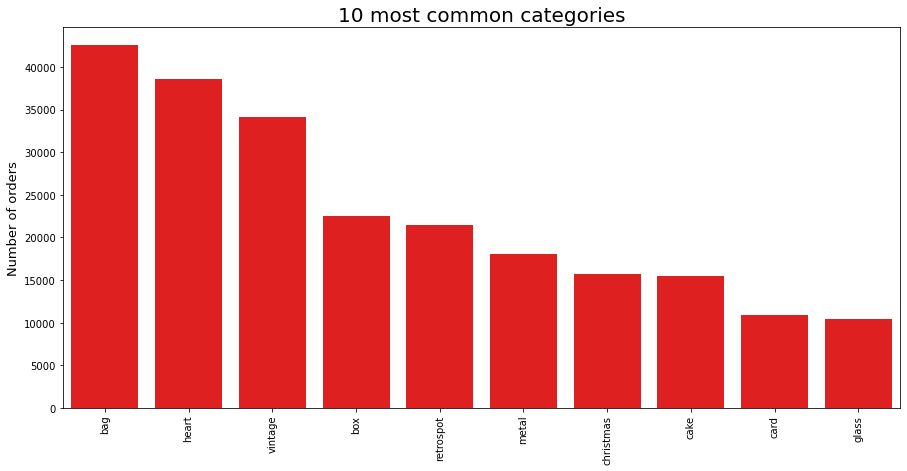

In [32]:
f, ax = plt.subplots(figsize=(15, 7))
plot_data = transactions['category'].value_counts().head(10)

sns.barplot(x=plot_data.index,
            y=plot_data.values,
            color="red",
            ax=ax,
            
           )
plt.ylabel('Number of orders', fontsize=13)
plt.xticks(rotation=90)
plt.title("10 most common categories", fontsize=20)
plt.show()